In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df= pd.read_excel("C:\\Users\\pc\\Downloads\\income.xlsx")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismael,28,60000
4,Kory,42,150000
5,Gautan,39,155000
6,David,41,160000
7,Andera,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

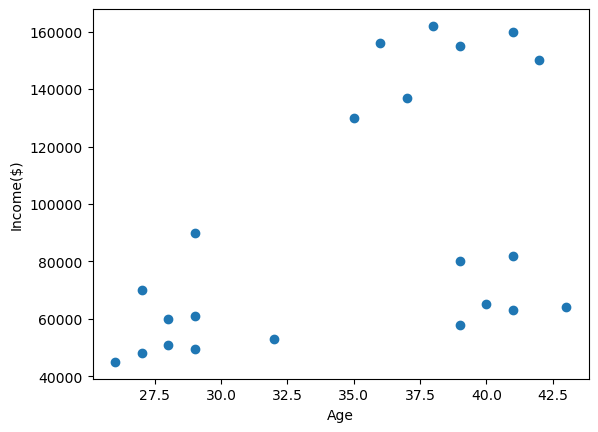

In [15]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [27]:
df['cluster']=y_predicted
df

,Name,Age,Income($),clusters,cluster
0,Rob,27,70000,0,0
1,Michael,29,90000,0,0
2,Mohan,29,61000,2,2
3,Ismael,28,60000,2,2
4,Kory,42,150000,1,1
5,Gautan,39,155000,1,1
6,David,41,160000,1,1
7,Andera,38,162000,1,1
8,Brad,36,156000,1,1
9,Angelina,35,130000,1,1


In [22]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

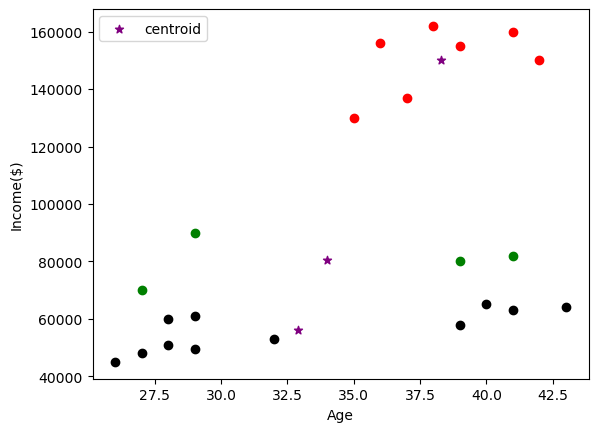

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [39]:
scaler=MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

In [40]:
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,2
3,Ismael,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,1,1


In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [44]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,Mohan,0.176471,0.136752,2,1
3,Ismael,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,1,0


In [46]:
df.drop("clusters",axis='columns')

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismael,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautan,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andera,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [58]:
km.cluster_centers_

array([[0.02941176, 0.01282051],
       [0.82352941, 0.30769231],
       [0.68627451, 0.96296296],
       [0.11764706, 0.2991453 ],
       [0.58823529, 0.75641026],
       [0.14705882, 0.08867521],
       [0.86764706, 0.14957265],
       [0.91176471, 0.94017094],
       [0.35294118, 0.06837607]])

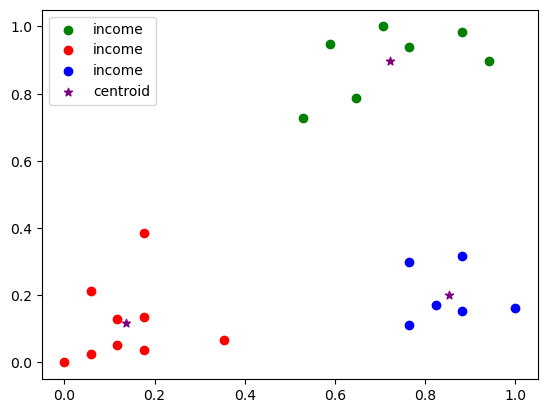

In [55]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='income')
plt.scatter(df3.Age,df3["Income($)"],color='blue',label='income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [56]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

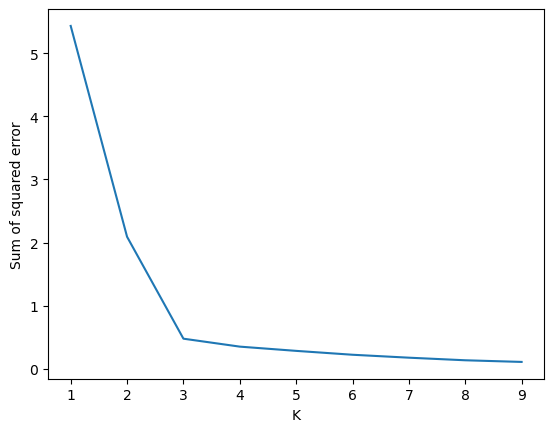

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

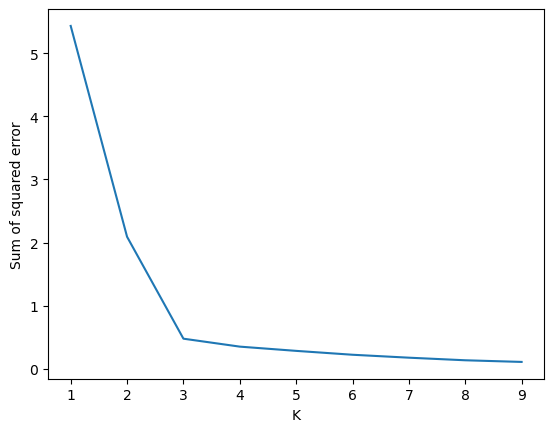

In [60]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)